## **PCA Implementation** 

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class PCA_Scratch:
  
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.eigenvalues_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
       
    def fit(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
       
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
       
        n_samples = X.shape[0]
        covariance_matrix = (X_centered.T @ X_centered) / (n_samples - 1)
       
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
       
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
       
        self.eigenvalues_ = eigenvalues
       
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]
       
        self.components_ = eigenvectors.T
       
        self.explained_variance_ = eigenvalues
       
        total_variance = np.sum(self.eigenvalues_)
        self.explained_variance_ratio_ = eigenvalues / total_variance
       
        return self
   
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
           
        X_centered = X - self.mean_
        X_transformed = X_centered @ self.components_.T
       
        return X_transformed
   
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
   
    def inverse_transform(self, X_transformed):
        if isinstance(X_transformed, pd.DataFrame):
            X_transformed = X_transformed.values
           
        X_reconstructed = X_transformed @ self.components_ + self.mean_
       
        return X_reconstructed
   
    def reconstruction_error(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
           
        X_transformed = self.transform(X)
        X_reconstructed = self.inverse_transform(X_transformed)
       
        mse = np.mean((X - X_reconstructed) ** 2)
       
        return mse


# **LOAD DATA**


In [29]:

data = load_breast_cancer()
X = data.data
y = data.target

print(f"Original data shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")


Original data shape: (569, 30)
Number of features: 30
Number of samples: 569


## **Standardize the data**

In [30]:

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

## **PCA WITH ALL COMPONENTS**

In [31]:


pca_full = PCA_Scratch()
X_pca_full = pca_full.fit_transform(X_standardized)

print("\n" + "=" * 60)
print("PCA WITH ALL COMPONENTS")
print("=" * 60)
print(f"Transformed data shape: {X_pca_full.shape}")
print("\nTop 10 Explained Variance Ratios:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"\nCumulative variance explained by first 5 PCs: {np.sum(pca_full.explained_variance_ratio_[:5]):.4f}")
print(f"Cumulative variance explained by first 10 PCs: {np.sum(pca_full.explained_variance_ratio_[:10]):.4f}")



PCA WITH ALL COMPONENTS
Transformed data shape: (569, 30)

Top 10 Explained Variance Ratios:
PC1: 0.4427 (44.27%)
PC2: 0.1897 (18.97%)
PC3: 0.0939 (9.39%)
PC4: 0.0660 (6.60%)
PC5: 0.0550 (5.50%)
PC6: 0.0402 (4.02%)
PC7: 0.0225 (2.25%)
PC8: 0.0159 (1.59%)
PC9: 0.0139 (1.39%)
PC10: 0.0117 (1.17%)

Cumulative variance explained by first 5 PCs: 0.8473
Cumulative variance explained by first 10 PCs: 0.9516


In [32]:

# ==================== PCA WITH 2 COMPONENTS ====================
pca_2d = PCA_Scratch(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_standardized)

# ==================== PCA WITH 3 COMPONENTS ====================
pca_3d = PCA_Scratch(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_standardized)

print("\n" + "=" * 60)
print("PCA WITH 3 COMPONENTS (FOR VISUALIZATION)")
print("=" * 60)
print(f"Transformed data shape: {X_pca_3d.shape}")
print("Explained variance ratios:")
for i, ratio in enumerate(pca_3d.explained_variance_ratio_):
    print(f" PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Total variance explained: {np.sum(pca_3d.explained_variance_ratio_):.4f}")



PCA WITH 3 COMPONENTS (FOR VISUALIZATION)
Transformed data shape: (569, 3)
Explained variance ratios:
 PC1: 0.4427 (44.27%)
 PC2: 0.1897 (18.97%)
 PC3: 0.0939 (9.39%)
Total variance explained: 0.7264


## **RECONSTRUCTION ERROR ANALYSIS** 

In [ ]:
print("\n" + "=" * 60)
print("RECONSTRUCTION ERROR ANALYSIS")
print("=" * 60)
n_components_list = [2, 5, 10, 15, 20, 30]
for n_comp in n_components_list:
    pca = PCA_Scratch(n_components=n_comp)
    pca.fit(X_standardized)
    error = pca.reconstruction_error(X_standardized)
    var_explained = np.sum(pca.explained_variance_ratio_)
    print(f"n_components={n_comp:2d} | Reconstruction Error: {error:.6f} | Variance Explained: {var_explained:.4f}")



RECONSTRUCTION ERROR ANALYSIS
n_components= 2 | Reconstruction Error: 0.367568 | Variance Explained: 0.6324
n_components= 5 | Reconstruction Error: 0.152657 | Variance Explained: 0.8473
n_components=10 | Reconstruction Error: 0.048431 | Variance Explained: 0.9516
n_components=15 | Reconstruction Error: 0.013512 | Variance Explained: 0.9865
n_components=20 | Reconstruction Error: 0.004428 | Variance Explained: 0.9956
n_components=30 | Reconstruction Error: 0.000000 | Variance Explained: 1.0000


# **Visualizations**

- Number of Components Vs Varience 

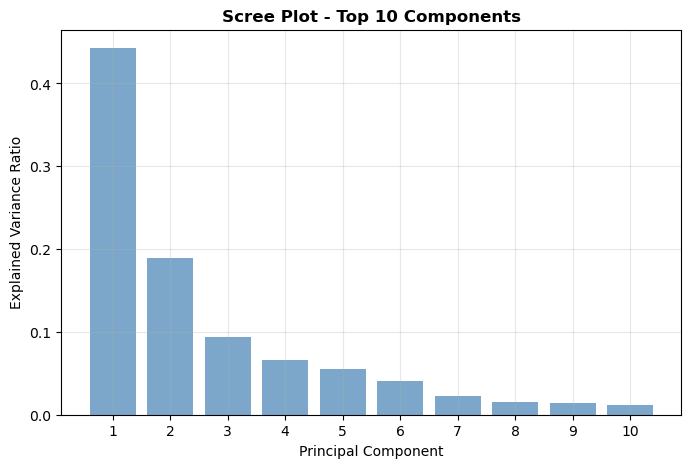

In [34]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), pca_full.explained_variance_ratio_[:10], alpha=0.7, color='steelblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Top 10 Components', fontweight='bold')
plt.xticks(range(1, 11))
plt.grid(alpha=0.3)
plt.show()

- Cumulative Variance

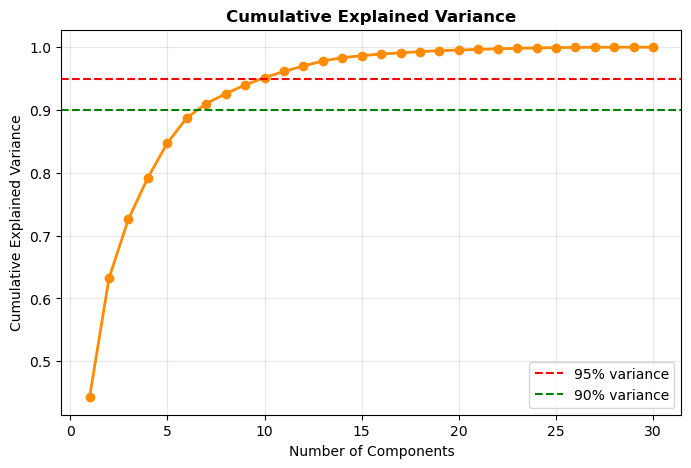

In [35]:
plt.figure(figsize=(8, 5))
cumulative = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o', linestyle='-', color='darkorange', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Reconstruction Error vs Number of Components

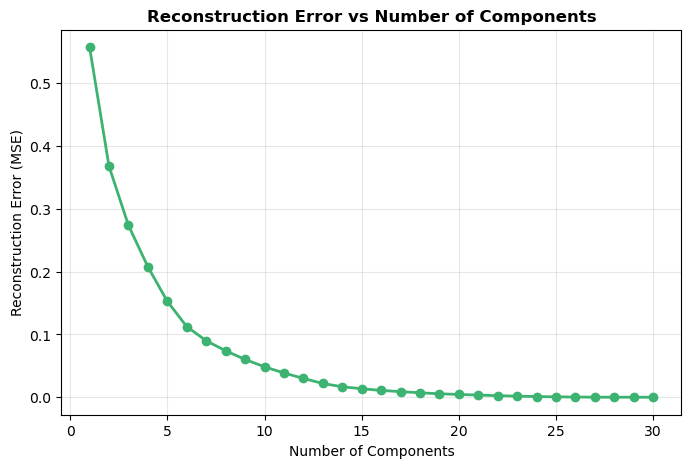

In [36]:
plt.figure(figsize=(8, 5))
errors = []
components_range = range(1, 31)
for n in components_range:
    pca_temp = PCA_Scratch(n_components=n)
    pca_temp.fit(X_standardized)
    errors.append(pca_temp.reconstruction_error(X_standardized))

plt.plot(components_range, errors, marker='o', linestyle='-', color='mediumseagreen', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs Number of Components', fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

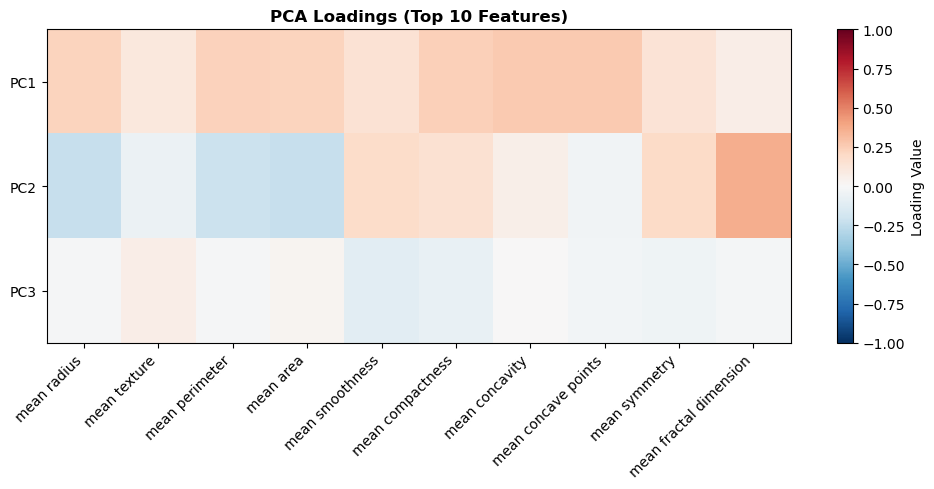

In [37]:
plt.figure(figsize=(10, 5))
feature_names = data.feature_names[:10]
loadings = pca_3d.components_[:, :10]
im = plt.imshow(loadings, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
plt.yticks(range(3), [f'PC{i+1}' for i in range(3)])
plt.xticks(range(10), feature_names, rotation=45, ha='right')
plt.title('PCA Loadings (Top 10 Features)', fontweight='bold')
plt.colorbar(im, label='Loading Value')
plt.tight_layout()
plt.show()

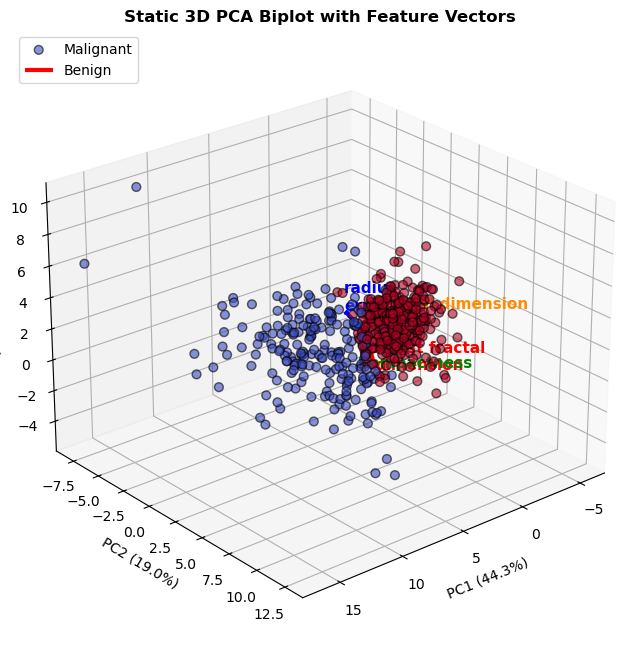

In [38]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
           c=y, cmap='coolwarm', alpha=0.6, edgecolors='k', s=40)

# Top 4 features
scale_factor = 6.0
top_features_idx = np.argsort(feature_importance)[-4:][::-1]
vector_colors = ['red', 'darkorange', 'green', 'blue']

label_map = {
    'mean radius': 'mean\nradius', 'mean texture': 'mean\ntexture',
    'mean perimeter': 'mean\nperimeter', 'mean area': 'mean\narea',
    'worst fractal dimension': 'worst fractal\ndimension',
    'fractal dimension error': 'fractal dimension\nerror',
    'worst compactness': 'worst\ncompactness',
    'radius error': 'radius\nerror',
    # add more if needed
}

for i, idx in enumerate(top_features_idx):
    vec = pca_3d.components_[:, idx] * scale_factor
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2],
              color=vector_colors[i], arrow_length_ratio=0.1, linewidth=3)
    
    name = data.feature_names[idx]
    display_name = label_map.get(name, name.replace(' ', '\n'))
    ax.text(vec[0]*1.05, vec[1]*1.05, vec[2]*1.05, display_name,
            color=vector_colors[i], fontsize=11, fontweight='bold')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax.set_title('Static 3D PCA Biplot with Feature Vectors', fontweight='bold')
ax.legend(['Malignant', 'Benign'], scatterpoints=1, loc='upper left')
ax.view_init(elev=25, azim=50)
ax.grid(True, alpha=0.3)
plt.show()

- Interactive 3D PCA

In [39]:
import plotly.graph_objects as go

df_pca = pd.DataFrame({
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2],
    'Class': ['Malignant' if label == 0 else 'Benign' for label in y]
})

fig = go.Figure()

# Points
fig.add_trace(go.Scatter3d(
    x=df_pca['PC1'], y=df_pca['PC2'], z=df_pca['PC3'],
    mode='markers',
    marker=dict(size=6, color=df_pca['Class'].map({'Malignant': 'red', 'Benign': 'blue'}),
                opacity=0.7, line=dict(width=1, color='black')),
    text=df_pca['Class'], hoverinfo='text'
))

# Feature vectors (top 4)
scale_factor = 8.0
top_features_idx = np.argsort(feature_importance)[-4:][::-1]
vector_colors = ['red', 'orange', 'green', 'darkblue']

for i, idx in enumerate(top_features_idx):
    vec = pca_3d.components_[:, idx] * scale_factor
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]],
                               mode='lines+markers',
                               line=dict(color=vector_colors[i], width=8),
                               marker=dict(size=[0, 10], color=vector_colors[i]),
                               name=data.feature_names[idx]))
    
    name = data.feature_names[idx].replace(' ', '<br>')
    fig.add_trace(go.Scatter3d(x=[vec[0]], y=[vec[1]], z=[vec[2]],
                               mode='text', text=[name], textposition="top center",
                               showlegend=False))

fig.update_layout(
    title="Interactive 3D PCA Biplot - Breast Cancer Dataset<br>(Rotate • Zoom • Pan • Hover)",
    scene=dict(
        xaxis_title=f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%} variance)',
        yaxis_title=f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%} variance)',
        zaxis_title=f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%} variance)',
        aspectmode='manual', aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2))
    ),
    width=900, height=700
)

# Legend for classes
fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                           marker=dict(size=10, color='red'), name='Malignant'))
fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                           marker=dict(size=10, color='blue'), name='Benign'))

fig.show()